# <h1> Importing Libraries </h1>

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords #importing stopwords from nltk
stop_words = stopwords.words('english')#loading stop words
import numpy as np #numpy for matrix manipulation
from sklearn.feature_extraction.text import TfidfVectorizer#load tfidf vector
import re #import regular expression for text manipulation
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics, svm
from nltk.stem.snowball import SnowballStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import csv
import os
import conda
from nltk.stem import PorterStemmer
conda_file_directories = conda.__file__
conda_dirs_ = conda_file_directories.split('lib')[0]
proj_lib_conda = os.path.join(os.path.join(conda_dirs_, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib_conda
import matplotlib
from mpl_toolkits.basemap import Basemap
import folium
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from pprint import pprint
import gensim
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.preprocessing.sequence import pad_sequences
import itertools
import warnings
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score 
warnings.filterwarnings('ignore')
stemmer = SnowballStemmer("english")
from bs4 import BeautifulSoup
import string
from collections import Counter
from scipy import sparse
import requests
import plotly
import chart_studio.plotly as cpy
import sklearn
import datetime
import descartes
from shapely.geometry import Point, Polygon
import plotly.graph_objs as go
%matplotlib inline
import unicodecsv
from unidecode import unidecode
import pyLDAvis.gensim
from scipy.sparse import csr_matrix
from gensim.models import Word2Vec #generating word2vec embeddings
from geopy.geocoders import Nominatim
from IPython.display import SVG
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation,GlobalMaxPool1D, Bidirectional, MaxPooling1D #For Neural Networks
import spacy
import pyLDAvis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix,recall_score
import xgboost as xgb
import time
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from bs4 import BeautifulSoup
import requests
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from textblob import TextBlob

In [3]:
analyzer = SentimentIntensityAnalyzer()

# Loading Dataset

In [4]:
df_depressed=pd.read_csv('dataset/df_depressed_tm.csv',index_col=0) 

In [5]:
df_dep = df_depressed.head(100)

In [6]:
df_dep['target'] = 1

In [7]:
df_dep.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest', 'target'],
      dtype='object')

In [8]:
df_happy = pd.read_csv('dataset/df_tweets_happy_tm.csv',index_col=0)

In [9]:
df_happy = df_happy.head(400)

In [10]:
df_happy['target'] = 0

In [11]:
df_fr = [df_dep,df_happy]

In [12]:
final_data = pd.concat(df_fr)

In [13]:
final_data.shape

(500, 35)

<h1> Data Cleaning </h1>

In [14]:
tweets_tolist=final_data['tweet'].tolist() 
tweets_tolist

["cw: suicide\n\nyou'd think after i attempted suicide and survived it would maybe give me a kick in the pants to start living better. but no, 3 days later and im back to being the depressed piece of shit ive always been, avoiding anything that takes any significant effort",
 'When someone called them on me for my attempt they did not save me, nor calm me down.  They took me to the drunk tank and treated me like I was on drugs (I was sober, I was just depressed) and told me if I ever attempted suicide again I would be give a large fine.',
 "I hope you are ok man. Please don't give up. I know what it's like to be so depressed death feels like the only escape. I have attempted suicide. Thankfully I'm still here. It can get better no matter how impossible that may seem right now. Please don't hurt yourself.",
 "I honestly think I've been more depressed than before I attempted suicide but I've improved so much on mental health here and there. Just in small little ways. And now despite bein

In [15]:
def remove_punctuation_marks(document):
    punctuation_free_text="".join([word for word in document if word not in string.punctuation])
    return punctuation_free_text

In [16]:
def remove_html_tags(document):
    initialize_soup=BeautifulSoup(document,'lxml')
    tags_free_context=initialize_soup.get_text()
    return tags_free_context

In [17]:
def removal_of_stopwords(document):
    context=[word for word in document if word not in stop_words]
    return context

In [18]:
def removal_of_links(document):
    text = re.sub(r"http\S+", "", document, flags=re.MULTILINE)
    return text

In [19]:
def remove_emojis(document):
    return document.encode('ascii', 'ignore').decode('ascii')

In [20]:
extras_list=['i','like','they','whom','what','where','my','ive','have','im','maybe','would','whether',1,2,3,4,5,2019,'when','They','I','took',
            'It','and','And','mom','dad','okay','Okay','say','Still','mother','father','Someone','someone','The','the','youre','just','Just',
             'dont','whats','even','yours','Ive','gets','This','this','bc','dm','he','He','she','She','5th','pic','twitter','Twitter',
             'eVgHWmsmvr','etc','90s','w','since','v','tH7zzf4Gqj','a2vse3xkjh','hi','name','Hi','com' ,'dagmyoikkx','alhamdulilah','rn','to',
             'To','gon','par','so','10','20',10,20,'ok','Ok','OK','emdr','u','we'
            ]

In [21]:
def remove_extra_words(document):
    context=[]
    #print("extras_list \n",extras_list)
    for word in document:
        #print(word)
        if word not in extras_list:
            context.append(word)
            #print("word ",word)
    return context

In [22]:
#porter = PorterStemmer()
#def stemmer_func(document):
#    stemmed_content = []
#    for word in document:
#        stemmed_content.append(porter.stem(word))
#    return stemmed_content

In [23]:
cleaned_tweets=[]

In [24]:
c=0     #performing all steps of data cleaning
for tweet in tweets_tolist:
    print(c)
    c=c+1
    cleaned_sentence=removal_of_links(tweet) #calling functions required for data cleaning
    cleaned_sentence=remove_emojis(cleaned_sentence)
    cleaned_sentence=remove_html_tags(cleaned_sentence)
    cleaned_sentence=remove_punctuation_marks(cleaned_sentence)
    tokens = nltk.word_tokenize(cleaned_sentence)
    cleaned_context_tt=removal_of_stopwords(tokens)
    cleaned_context=remove_extra_words(cleaned_context_tt)
    #cleaned_context = stemmer_func(cleaned_context)
    filtered_sentence = []
    for w in cleaned_context:
        filtered_sentence.append(w.lower())
    cleaned_context = ' '.join([item for item in filtered_sentence])   
    cleaned_tweets.append(cleaned_context)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<h1> (Step 1.A) TFIDF (FINDING WORDCOUNTS AND FREQUENCIES) </h1>

In [25]:
total_words=[]
for i in range(0,len(cleaned_tweets)):
    tokens = nltk.word_tokenize(cleaned_tweets[i])
    for w in tokens:
        total_words.append(w)
print(len(total_words))

8944


In [26]:
counts=Counter(total_words)

In [27]:
len(counts)

3321

In [28]:
counts

Counter({'cw': 1,
         'suicide': 105,
         'youd': 2,
         'think': 24,
         'attempted': 100,
         'survived': 5,
         'give': 10,
         'kick': 2,
         'pants': 1,
         'start': 4,
         'living': 6,
         'better': 13,
         '3': 23,
         'days': 13,
         'later': 5,
         'back': 19,
         'depressed': 100,
         'piece': 3,
         'shit': 3,
         'always': 31,
         'avoiding': 1,
         'anything': 5,
         'takes': 4,
         'significant': 2,
         'effort': 1,
         'when': 11,
         'called': 7,
         'attempt': 3,
         'save': 3,
         'calm': 1,
         'drunk': 2,
         'tank': 1,
         'treated': 2,
         'drugs': 4,
         'sober': 2,
         'told': 5,
         'ever': 19,
         'large': 2,
         'fine': 3,
         'hope': 30,
         'man': 19,
         'please': 10,
         'know': 34,
         'death': 1,
         'feels': 6,
         'escape': 1,
   

In [29]:
vocab={j:i for i,j in enumerate(counts.keys())}

In [30]:
vectorize = TfidfVectorizer( vocabulary=vocab)
tweets_matrix = vectorize.fit_transform(cleaned_tweets)
tweets_matrix

<500x3321 sparse matrix of type '<class 'numpy.float64'>'
	with 8431 stored elements in Compressed Sparse Row format>

In [31]:
words_included = vectorize.vocabulary_
words_included

{'cw': 0,
 'suicide': 1,
 'youd': 2,
 'think': 3,
 'attempted': 4,
 'survived': 5,
 'give': 6,
 'kick': 7,
 'pants': 8,
 'start': 9,
 'living': 10,
 'better': 11,
 '3': 12,
 'days': 13,
 'later': 14,
 'back': 15,
 'depressed': 16,
 'piece': 17,
 'shit': 18,
 'always': 19,
 'avoiding': 20,
 'anything': 21,
 'takes': 22,
 'significant': 23,
 'effort': 24,
 'when': 25,
 'called': 26,
 'attempt': 27,
 'save': 28,
 'calm': 29,
 'drunk': 30,
 'tank': 31,
 'treated': 32,
 'drugs': 33,
 'sober': 34,
 'told': 35,
 'ever': 36,
 'large': 37,
 'fine': 38,
 'hope': 39,
 'man': 40,
 'please': 41,
 'know': 42,
 'death': 43,
 'feels': 44,
 'escape': 45,
 'thankfully': 46,
 'im': 47,
 'still': 48,
 'get': 49,
 'matter': 50,
 'impossible': 51,
 'may': 52,
 'seem': 53,
 'right': 54,
 'hurt': 55,
 'honestly': 56,
 'improved': 57,
 'much': 58,
 'mental': 59,
 'health': 60,
 'small': 61,
 'little': 62,
 'ways': 63,
 'despite': 64,
 'ill': 65,
 'guess': 66,
 'thats': 67,
 'progress': 68,
 '2019': 69,
 'times

In [32]:
words_included

{'cw': 0,
 'suicide': 1,
 'youd': 2,
 'think': 3,
 'attempted': 4,
 'survived': 5,
 'give': 6,
 'kick': 7,
 'pants': 8,
 'start': 9,
 'living': 10,
 'better': 11,
 '3': 12,
 'days': 13,
 'later': 14,
 'back': 15,
 'depressed': 16,
 'piece': 17,
 'shit': 18,
 'always': 19,
 'avoiding': 20,
 'anything': 21,
 'takes': 22,
 'significant': 23,
 'effort': 24,
 'when': 25,
 'called': 26,
 'attempt': 27,
 'save': 28,
 'calm': 29,
 'drunk': 30,
 'tank': 31,
 'treated': 32,
 'drugs': 33,
 'sober': 34,
 'told': 35,
 'ever': 36,
 'large': 37,
 'fine': 38,
 'hope': 39,
 'man': 40,
 'please': 41,
 'know': 42,
 'death': 43,
 'feels': 44,
 'escape': 45,
 'thankfully': 46,
 'im': 47,
 'still': 48,
 'get': 49,
 'matter': 50,
 'impossible': 51,
 'may': 52,
 'seem': 53,
 'right': 54,
 'hurt': 55,
 'honestly': 56,
 'improved': 57,
 'much': 58,
 'mental': 59,
 'health': 60,
 'small': 61,
 'little': 62,
 'ways': 63,
 'despite': 64,
 'ill': 65,
 'guess': 66,
 'thats': 67,
 'progress': 68,
 '2019': 69,
 'times

<h1> (Step 1.B) LDA (TOPIC MODELING) </h1>

In [33]:
def extracting_words(tweets): 
    for tweet in tweets:
        yield(gensim.utils.simple_preprocess(str(tweet)))  

In [34]:
dep_tweet_words = list(extracting_words(cleaned_tweets))

In [35]:
dep_id_to_word = corpora.Dictionary(dep_tweet_words)

In [36]:
dep_id_to_word

In [37]:
dep_text = dep_tweet_words

In [38]:
dep_text

[['cw',
  'suicide',
  'youd',
  'think',
  'attempted',
  'suicide',
  'survived',
  'give',
  'kick',
  'pants',
  'start',
  'living',
  'better',
  'days',
  'later',
  'back',
  'depressed',
  'piece',
  'shit',
  'always',
  'avoiding',
  'anything',
  'takes',
  'significant',
  'effort'],
 ['when',
  'called',
  'attempt',
  'save',
  'calm',
  'drunk',
  'tank',
  'treated',
  'drugs',
  'sober',
  'depressed',
  'told',
  'ever',
  'attempted',
  'suicide',
  'give',
  'large',
  'fine'],
 ['hope',
  'man',
  'please',
  'give',
  'know',
  'depressed',
  'death',
  'feels',
  'escape',
  'attempted',
  'suicide',
  'thankfully',
  'im',
  'still',
  'get',
  'better',
  'matter',
  'impossible',
  'may',
  'seem',
  'right',
  'please',
  'hurt'],
 ['honestly',
  'think',
  'depressed',
  'attempted',
  'suicide',
  'improved',
  'much',
  'mental',
  'health',
  'small',
  'little',
  'ways',
  'despite',
  'depressed',
  'back',
  'think',
  'ill',
  'ever',
  'attempt',
 

In [39]:
dep_corpus = [dep_id_to_word.doc2bow(text) for text in dep_text]

In [40]:
dep_lda_model = gensim.models.ldamodel.LdaModel(corpus=dep_corpus,  
                                           id2word=dep_id_to_word,chunksize=100,
                                           num_topics=10,
                                                passes=10, random_state=100,
                                                per_word_topics=True,update_every=1,alpha='auto')

In [41]:
dep_topics = dep_lda_model.show_topics(formatted=False)
dep_topics

[(0,
  [('really', 0.019726323),
   ('best', 0.017653508),
   ('work', 0.015335287),
   ('joyful', 0.0150539605),
   ('we', 0.013796854),
   ('thanks', 0.010603611),
   ('time', 0.010372201),
   ('the', 0.009874575),
   ('jesus', 0.008986079),
   ('enough', 0.008672929)]),
 (1,
  [('joyful', 0.03165888),
   ('look', 0.02281201),
   ('you', 0.014991414),
   ('deserve', 0.013269423),
   ('love', 0.013224414),
   ('thankful', 0.0114177065),
   ('actually', 0.008731627),
   ('what', 0.00866674),
   ('around', 0.008549892),
   ('guys', 0.00746852)]),
 (2,
  [('if', 0.020398626),
   ('moment', 0.018266365),
   ('tears', 0.012820895),
   ('anything', 0.01017588),
   ('living', 0.009845527),
   ('steam', 0.009722823),
   ('joy', 0.009653515),
   ('result', 0.00918461),
   ('love', 0.009004631),
   ('am', 0.008446856)]),
 (3,
  [('hoseok', 0.042676218),
   ('am', 0.028034233),
   ('amazing', 0.01944619),
   ('as', 0.018538024),
   ('and', 0.017826846),
   ('to', 0.015730716),
   ('safe', 0.0102

In [42]:
pyLDAvis.enable_notebook() #showing lda topics in notebook
dep_vis = pyLDAvis.gensim.prepare(dep_lda_model, dep_corpus, dep_id_to_word) #visualizing lda model
dep_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.087154  0.249008       1        1  22.387936
7     -0.302695 -0.106058       2        1  20.854506
6      0.034949  0.111487       3        1  13.161797
8      0.036313 -0.036932       4        1  12.962418
0      0.044865  0.056258       5        1  11.132141
1      0.047701 -0.050242       6        1   5.663420
9      0.054012 -0.031244       7        1   4.670518
3      0.076645 -0.076934       8        1   3.737397
5      0.047684 -0.055061       9        1   2.992024
2      0.047680 -0.060282      10        1   2.437846, topic_info=           Term        Freq       Total Category  logprob  loglift
568       happy  156.000000  156.000000  Default  30.0000  30.0000
1517      enjoy   85.000000   85.000000  Default  29.0000  29.0000
2800  amazingly   82.000000   82.000000  Default  28.0000  28.0000
983      joyful  180.000000  180.000000  Default  27.0000  27.0000
376        good   29.000000   29.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
584       tried    1.415341    3.247784  Topic10  -5.0194   2.8835
1418        joy    2.067443   16.820408  Topic10  -4.6404   1.6178
1412         am    1.809019   15.079226  Topic10  -4.7740   1.5935
162        love    1.928475   65.603798  Topic10  -4.7100   0.1872
244        life    1.314709   41.513836  Topic10  -5.0931   0.2616

[448 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
226       5  0.913964          able
496       6  0.807549      actually
1638      6  0.833104  affirmations
668       1  0.968989           age
184       4  0.897234           all
...     ...       ...           ...
1351      2  0.848346         youll
248       2  0.923307         young
586       3  0.956626          your
2450      5  0.936405         youve
911       9  0.476167           yrs

[494 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 9, 1, 2, 10, 4, 6, 3])

In [43]:
dep_lda_model.print_topics(-1)

[(0,
  '0.020*"really" + 0.018*"best" + 0.015*"work" + 0.015*"joyful" + 0.014*"we" + 0.011*"thanks" + 0.010*"time" + 0.010*"the" + 0.009*"jesus" + 0.009*"enough"'),
 (1,
  '0.032*"joyful" + 0.023*"look" + 0.015*"you" + 0.013*"deserve" + 0.013*"love" + 0.011*"thankful" + 0.009*"actually" + 0.009*"what" + 0.009*"around" + 0.007*"guys"'),
 (2,
  '0.020*"if" + 0.018*"moment" + 0.013*"tears" + 0.010*"anything" + 0.010*"living" + 0.010*"steam" + 0.010*"joy" + 0.009*"result" + 0.009*"love" + 0.008*"am"'),
 (3,
  '0.043*"hoseok" + 0.028*"am" + 0.019*"amazing" + 0.019*"as" + 0.018*"and" + 0.016*"to" + 0.010*"safe" + 0.010*"loved" + 0.008*"is" + 0.007*"busy"'),
 (4,
  '0.020*"suicide" + 0.019*"attempted" + 0.019*"time" + 0.019*"depressed" + 0.016*"joyful" + 0.015*"feel" + 0.015*"you" + 0.014*"one" + 0.010*"im" + 0.009*"glad"'),
 (5,
  '0.032*"new" + 0.020*"making" + 0.013*"stop" + 0.010*"people" + 0.009*"follow" + 0.009*"next" + 0.008*"na" + 0.008*"gods" + 0.007*"were" + 0.006*"updates"'),
 (6,


<h1> Dominant Topics in Tweets </h1>

In [44]:
def get_topics_sentences(ldamodel=dep_lda_model, corpus=dep_corpus, text=dep_tweet_words):
    sent_get_topics_df = pd.DataFrame()

    
    for i, row_l in enumerate(ldamodel[corpus]):
        rw = row_l[0] if ldamodel.per_word_topics else row_l            
        
        rw = sorted(rw, key=lambda x_doc: (x_doc[1]), reverse=True)
       
        for k, (topic_nm, proportion_topic) in enumerate(rw):
            if k == 0:  
                w_p = ldamodel.show_topic(topic_nm)
                topic_keywords = ", ".join([w for w, prop in w_p])
                sent_get_topics_df = sent_get_topics_df.append(pd.Series([int(topic_nm), round(proportion_topic,5), topic_keywords]), ignore_index=True)
            else:
                break
    sent_get_topics_df.columns = ['Dominant Topics', 'Percentage Contribution', 'Keywords in Topic']

    content = pd.Series(text)
    sent_get_topics_df = pd.concat([sent_get_topics_df, content], axis=1)
    return(sent_get_topics_df)

df_get_topic_sents_keywords = get_topics_sentences(ldamodel=dep_lda_model, corpus=dep_corpus, text=dep_tweet_words)


In [45]:
df_get_dominant_topic = df_get_topic_sents_keywords.reset_index()
df_get_dominant_topic.columns = ['Document Num', 'Dominant Topics', 'Topic Perc Contrib', 'Keywords', 'Text']
df_get_dominant_topic.head(10)

,Document Num,Dominant Topics,Topic Perc Contrib,Keywords,Text
0,0,4.0,0.75932,"suicide, attempted, time, depressed, joyful, f...","[cw, suicide, youd, think, attempted, suicide,..."
1,1,8.0,0.66599,"joyful, good, so, heart, every, god, thank, us...","[when, called, attempt, save, calm, drunk, tan..."
2,2,7.0,0.71879,"happy, enjoy, amazingly, enjoying, birthday, d...","[hope, man, please, give, know, depressed, dea..."
3,3,9.0,0.62137,"much, back, book, experience, little, end, fat...","[honestly, think, depressed, attempted, suicid..."
4,4,6.0,0.80640,"joyful, much, many, you, family, life, live, l...","[depressed, attempted, suicide, times, family,..."
5,5,0.0,0.53429,"really, best, work, joyful, we, thanks, time, ...","[feel, without, past, year, traumatici, attemp..."
6,6,8.0,0.46638,"joyful, good, so, heart, every, god, thank, us...","[still, cant, believe, talked, every, day, hos..."
7,7,7.0,0.57005,"happy, enjoy, amazingly, enjoying, birthday, d...","[darkier, edgier, suicidal, deadpool, attempte..."
8,8,0.0,0.92218,"really, best, work, joyful, we, thanks, time, ...","[but, invalidating, someones, struggles, partn..."
9,9,4.0,0.47184,"suicide, attempted, time, depressed, joyful, f...","[know, worse, brother, attempted, suicide, dep..."


<h1> (Step 1.C) Named Entity Recognition </h1>

In [46]:
ner_cleaned_tweets = []
c=0     #performing all steps of data cleaning
for tweet in tweets_tolist:
    print(c)
    c=c+1
    cleaned_sentence=removal_of_links(tweet) #calling functions required for data cleaning
    cleaned_sentence=remove_emojis(cleaned_sentence)
    cleaned_sentence=remove_html_tags(cleaned_sentence)
    cleaned_sentence=remove_punctuation_marks(cleaned_sentence)
    tokens = nltk.word_tokenize(cleaned_sentence)
    cleaned_context_tt=removal_of_stopwords(tokens)
    cleaned_context=remove_extra_words(cleaned_context_tt)
    filtered_sentence = []
    for w in cleaned_context:
        filtered_sentence.append(w.lower())
    cleaned_context = ' '.join([item for item in filtered_sentence])   
    ner_cleaned_tweets.append(cleaned_context)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
cleaned_str = " ".join(ner_cleaned_tweets)

In [48]:
sentence = ""
for tweet in ner_cleaned_tweets:
    for w in tweet:
        sentence = sentence+str(w)+""

In [49]:
sentence

'cw suicide youd think attempted suicide survived give kick pants start living better 3 days later back depressed piece shit always avoiding anything takes significant effortwhen called attempt save calm drunk tank treated drugs sober depressed told ever attempted suicide give large finehope man please give know depressed death feels escape attempted suicide thankfully im still get better matter impossible may seem right please hurthonestly think depressed attempted suicide improved much mental health small little ways despite depressed back think ill ever attempt guess thats progress2019 depressed attempted suicide 3 times family broke apart emotional physical manipulated think given eating disorder type thing im scared tell anyonefeel without past year traumatici attempted suicide thrice depressed sleepless nights filled ptsdall want im proud want thank kwamedame forcing talking situationsstill cant believe talked every day hospital attempted suicide got year later said miserable dep

In [50]:
documents = nlp(sentence)

In [51]:
pprint([(document_c.text, document_c.label_) for document_c in documents.ents])

[('3 days later', 'DATE'),
 ('progress2019', 'DATE'),
 ('3', 'CARDINAL'),
 ('year later', 'DATE'),
 ('karma', 'ORG'),
 ('7 years ago', 'DATE'),
 ('least4 years ago', 'DATE'),
 ('3 years ago', 'DATE'),
 ('today', 'DATE'),
 ('two', 'CARDINAL'),
 ('years ago', 'DATE'),
 ('chris', 'PERSON'),
 ('6th', 'ORDINAL'),
 ('today', 'DATE'),
 ('1106 days', 'DATE'),
 ('fbi', 'ORG'),
 ('john dodge', 'PERSON'),
 ('love married', 'ORG'),
 ('many years ago', 'DATE'),
 ('sev times', 'ORG'),
 ('august', 'DATE'),
 ('trans', 'NORP'),
 ('100', 'CARDINAL'),
 ('today', 'DATE'),
 ('about 9 years ago', 'DATE'),
 ('around 8 years', 'DATE'),
 ('a years', 'DATE'),
 ('depressionhypomania', 'GPE'),
 ('100', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('17 year old', 'DATE'),
 ('months ago', 'DATE'),
 ('nos', 'ORG'),
 ('6th', 'ORDINAL'),
 ('3', 'CARDINAL'),
 ('6th', 'ORDINAL'),
 ('one 30 seconds', 'TIME'),
 ('third', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('hundreds', 'CARDINAL'),
 ('2009', 'DATE'),
 ('2', 'C

In [52]:
[(xd_get.orth_,xd_get.pos_, xd_get.lemma_) for xd_get in [y for y in nlp(str(documents)) if not y.is_stop and y.pos_ != 'PUNCT']]

[('cw', 'PROPN', 'cw'),
 ('suicide', 'NOUN', 'suicide'),
 ('d', 'VERB', 'would'),
 ('think', 'VERB', 'think'),
 ('attempted', 'VERB', 'attempt'),
 ('suicide', 'NOUN', 'suicide'),
 ('survived', 'VERB', 'survive'),
 ('kick', 'NOUN', 'kick'),
 ('pants', 'NOUN', 'pant'),
 ('start', 'VERB', 'start'),
 ('living', 'VERB', 'live'),
 ('better', 'ADJ', 'well'),
 ('3', 'NUM', '3'),
 ('days', 'NOUN', 'day'),
 ('later', 'ADV', 'later'),
 ('depressed', 'ADJ', 'depressed'),
 ('piece', 'NOUN', 'piece'),
 ('shit', 'NOUN', 'shit'),
 ('avoiding', 'VERB', 'avoid'),
 ('takes', 'VERB', 'take'),
 ('significant', 'ADJ', 'significant'),
 ('effortwhen', 'NOUN', 'effortwhen'),
 ('called', 'VERB', 'call'),
 ('attempt', 'NOUN', 'attempt'),
 ('save', 'VERB', 'save'),
 ('calm', 'ADJ', 'calm'),
 ('drunk', 'ADJ', 'drunk'),
 ('tank', 'NOUN', 'tank'),
 ('treated', 'VERB', 'treat'),
 ('drugs', 'NOUN', 'drug'),
 ('sober', 'ADJ', 'sober'),
 ('depressed', 'ADJ', 'depressed'),
 ('told', 'VERB', 'tell'),
 ('attempted', 'VERB'

In [53]:
store_ent = {}
#for i in range(len(tweets_tolist)):
    #store_ent[i] = []
count_tw =0 
for tw in range(len(ner_cleaned_tweets)):
    doc = nlp(str(ner_cleaned_tweets[tw]))
    check_ent = [(x) for x in nlp(str(doc)).ents]
    if not(check_ent):
        continue
    else:
        store_ent[count_tw] = check_ent
        count_tw = count_tw+1

In [54]:
store_ent

{0: [3 days later],
 1: [2019, 3],
 2: [without past year, nights],
 3: [year later, karma],
 4: [7 years ago],
 5: [4 years ago],
 6: [3 years ago, today, two],
 7: [us, years ago, chris],
 8: [6th],
 9: [1612017, today, 1106 days],
 10: [fbi, hernia],
 11: [john dodge, love married],
 12: [many years ago],
 13: [sev times],
 14: [august],
 15: [100, today, every day],
 16: [about 9 years ago, house, around 8 years],
 17: [17 a years, kenidra glad],
 18: [depressionhypomania, 100],
 19: [pur college department],
 20: [one, 17 year old],
 21: [months ago, nos],
 22: [tw depression, 6th, 3, 6th],
 23: [one 30 seconds],
 24: [third, one],
 25: [hundreds],
 26: [1, 2009, 2, 3, 4, 5, almost years],
 27: [3, three],
 28: [almost decade],
 29: [3],
 30: [one, 30th, one],
 31: [god, mental illness luv, ww3],
 32: [2020, 2019],
 33: [last night],
 34: [anxious least seven years, one day],
 35: [ten years ago],
 36: [four],
 37: [mdd, 3 hours, one point year half],
 38: [tw, 12, last year jan 1

In [55]:
[(z_word) for z_word in nlp(str(documents)).ents]

[3 days later,
 progress2019,
 3,
 year later,
 karma,
 7 years ago,
 least4 years ago,
 3 years ago,
 today,
 two,
 years ago,
 chris,
 6th,
 today,
 1106 days,
 fbi,
 john dodge,
 love married,
 many years ago,
 sev times,
 august,
 trans,
 100,
 today,
 about 9 years ago,
 around 8 years,
 a years,
 depressionhypomania,
 100,
 one,
 one,
 17 year old,
 months ago,
 nos,
 6th,
 3,
 6th,
 one 30 seconds,
 third,
 one,
 hundreds,
 2009,
 2,
 3,
 4,
 5,
 almost years,
 three,
 almost decade,
 3,
 one,
 30th,
 mental illness luv,
 ww3,
 2020,
 2019,
 last night,
 anxious least seven years,
 one day,
 wellten years ago,
 four,
 3 hours,
 one point year half,
 12,
 last year jan 1st,
 midnight,
 almost 1 year,
 medicareafford house,
 year,
 2nd day,
 2020,
 2019,
 decade,
 list decade,
 july 2018,
 midlate year,
 age 14,
 three,
 16,
 2,
 happened beginning year,
 years,
 three,
 december first month,
 11 degree,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 love2019 year,
 bitcoin,
 1gnnd5g6eh

In [56]:
sent = [z for z in documents.sents]
print(sent[34])

child1612017 drunk depressed emotionally numb attempted suicide survived when longer able change situation challenged change today know


In [57]:
displacy.render(nlp(str(sent[34])), style='ent',jupyter=True)

In [58]:
sen=sent[20]

In [59]:
#To run the displacy.serve code for visualization of a sentence in NER  ( shut down the server tab port5000 to run the code above)

In [60]:
#displacy.serve(sen, style='dep', options={'distance': 90})

In [61]:
displacy.render(documents, jupyter=True, style='ent')

# <h1> (Step 2) SENTIMENT ANALYSIS FOR EACH TWEET </h1>

In [62]:
for tweet1 in cleaned_tweets:
    analysis = analyzer.polarity_scores(tweet1)
    value_check = analysis['compound']
    if value_check > 0.0:    
        senti_obt = 'Positive'
    elif value_check < 0.0:     
        senti_obt = 'Negative'
    else:       
        senti_obt = 'Neutral'
    print(tweet1+" :" ,senti_obt+" ",str(analysis))

cw suicide youd think attempted suicide survived give kick pants start living better 3 days later back depressed piece shit always avoiding anything takes significant effort : Negative  {'neg': 0.413, 'neu': 0.406, 'pos': 0.181, 'compound': -0.9062}
when called attempt save calm drunk tank treated drugs sober depressed told ever attempted suicide give large fine : Negative  {'neg': 0.346, 'neu': 0.407, 'pos': 0.247, 'compound': -0.5994}
hope man please give know depressed death feels escape attempted suicide thankfully im still get better matter impossible may seem right please hurt : Negative  {'neg': 0.35, 'neu': 0.278, 'pos': 0.371, 'compound': -0.4767}
honestly think depressed attempted suicide improved much mental health small little ways despite depressed back think ill ever attempt guess thats progress : Negative  {'neg': 0.287, 'neu': 0.406, 'pos': 0.307, 'compound': -0.0674}
2019 depressed attempted suicide 3 times family broke apart emotional physical manipulated think given 

# (Step 2.A) SENTIMENT ANALYSIS FOR EACH WORD

In [63]:
dep_text

[['cw',
  'suicide',
  'youd',
  'think',
  'attempted',
  'suicide',
  'survived',
  'give',
  'kick',
  'pants',
  'start',
  'living',
  'better',
  'days',
  'later',
  'back',
  'depressed',
  'piece',
  'shit',
  'always',
  'avoiding',
  'anything',
  'takes',
  'significant',
  'effort'],
 ['when',
  'called',
  'attempt',
  'save',
  'calm',
  'drunk',
  'tank',
  'treated',
  'drugs',
  'sober',
  'depressed',
  'told',
  'ever',
  'attempted',
  'suicide',
  'give',
  'large',
  'fine'],
 ['hope',
  'man',
  'please',
  'give',
  'know',
  'depressed',
  'death',
  'feels',
  'escape',
  'attempted',
  'suicide',
  'thankfully',
  'im',
  'still',
  'get',
  'better',
  'matter',
  'impossible',
  'may',
  'seem',
  'right',
  'please',
  'hurt'],
 ['honestly',
  'think',
  'depressed',
  'attempted',
  'suicide',
  'improved',
  'much',
  'mental',
  'health',
  'small',
  'little',
  'ways',
  'despite',
  'depressed',
  'back',
  'think',
  'ill',
  'ever',
  'attempt',
 

In [64]:
str_dep_text = []
for tw in counts:
        str_dep_text.append(str(tw))

In [65]:
str_dep_text

['cw',
 'suicide',
 'youd',
 'think',
 'attempted',
 'survived',
 'give',
 'kick',
 'pants',
 'start',
 'living',
 'better',
 '3',
 'days',
 'later',
 'back',
 'depressed',
 'piece',
 'shit',
 'always',
 'avoiding',
 'anything',
 'takes',
 'significant',
 'effort',
 'when',
 'called',
 'attempt',
 'save',
 'calm',
 'drunk',
 'tank',
 'treated',
 'drugs',
 'sober',
 'told',
 'ever',
 'large',
 'fine',
 'hope',
 'man',
 'please',
 'know',
 'death',
 'feels',
 'escape',
 'thankfully',
 'im',
 'still',
 'get',
 'matter',
 'impossible',
 'may',
 'seem',
 'right',
 'hurt',
 'honestly',
 'improved',
 'much',
 'mental',
 'health',
 'small',
 'little',
 'ways',
 'despite',
 'ill',
 'guess',
 'thats',
 'progress',
 '2019',
 'times',
 'family',
 'broke',
 'apart',
 'emotional',
 'physical',
 'manipulated',
 'given',
 'eating',
 'disorder',
 'type',
 'thing',
 'scared',
 'tell',
 'anyone',
 'feel',
 'without',
 'past',
 'year',
 'traumatici',
 'thrice',
 'sleepless',
 'nights',
 'filled',
 'ptsdal

In [66]:
len(str_dep_text)

3321

In [67]:
#counts_dep_text = Counter(str_dep_text)

In [68]:
#counts_dep_text

In [69]:
count_pos_word = 0 
count_neg_word = 0
count_neu_word = 0
for word in str_dep_text:
    analysis = analyzer.polarity_scores(word)
    value_check = analysis['compound']
    if value_check > 0.0:    
        senti_obt = 'Positive'
        count_pos_word = count_pos_word+1
    elif value_check < 0.0:     
        senti_obt = 'Negative'
        count_neg_word = count_neg_word+1
    else:       
        senti_obt = 'Neutral'
        count_neu_word = count_neu_word+1
    print(word,": ",str(analysis))

cw :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
suicide :  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6705}
youd :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
think :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
attempted :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
survived :  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
give :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
kick :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pants :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
start :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
living :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
better :  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
3 :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
days :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
later :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
back :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

In [70]:
print("Count of Positive Words: ",count_pos_word)
print("Count of Negative Words: ",count_neg_word)
print("Count of Neutral Words: ",count_neu_word)

Count of Positive Words:  352
Count of Negative Words:  256
Count of Neutral Words:  2713


In [71]:
#    #EXAMPLE FOR EACH WORD SENTIMENT 
#
#    analysis = analyzer.polarity_scores('love')
#    value_check = analysis['compound']
#    if value_check > 0.0:    
#        senti_obt = 'Positive'
#    elif value_check < 0.0:     
#        senti_obt = 'Negative'
#    else:       
#        senti_obt = 'Neutral'
#    print(senti_obt+" ",str(analysis))
#

<h1> (Step 2.B) Sentiment Analysis of topics </h1>

In [72]:
words_in_topics = {}
for i in range(len(dep_topics)):
    words_in_topics[i] = []

In [73]:
for count in range(len(dep_topics)):
    list_range = dep_topics[count][1]
    for items in range(len(list_range)):
        words_in_topics[count].append(list_range[items][0])

In [74]:
words_in_topics

{0: ['really',
  'best',
  'work',
  'joyful',
  'we',
  'thanks',
  'time',
  'the',
  'jesus',
  'enough'],
 1: ['joyful',
  'look',
  'you',
  'deserve',
  'love',
  'thankful',
  'actually',
  'what',
  'around',
  'guys'],
 2: ['if',
  'moment',
  'tears',
  'anything',
  'living',
  'steam',
  'joy',
  'result',
  'love',
  'am'],
 3: ['hoseok',
  'am',
  'amazing',
  'as',
  'and',
  'to',
  'safe',
  'loved',
  'is',
  'busy'],
 4: ['suicide',
  'attempted',
  'time',
  'depressed',
  'joyful',
  'feel',
  'you',
  'one',
  'im',
  'glad'],
 5: ['new',
  'making',
  'stop',
  'people',
  'follow',
  'next',
  'na',
  'gods',
  'were',
  'updates'],
 6: ['joyful',
  'much',
  'many',
  'you',
  'family',
  'life',
  'live',
  'love',
  'your',
  'take'],
 7: ['happy',
  'enjoy',
  'amazingly',
  'enjoying',
  'birthday',
  'day',
  'joyful',
  'hope',
  'im',
  'love'],
 8: ['joyful',
  'good',
  'so',
  'heart',
  'every',
  'god',
  'thank',
  'us',
  'joy',
  'person'],
 9: [

In [75]:
for i in range(len(words_in_topics)):
    str_topic = ' '.join(words_in_topics[i])
    print(str_topic)
    analysis = analyzer.polarity_scores(str_topic)
    value_check = analysis['compound']
    if value_check > 0.0:    
        senti_obt = 'Positive'
    elif value_check < 0.0:     
        senti_obt = 'Negative'
    else:       
        senti_obt = 'Neutral'
    print("Topic ",i,": ",senti_obt,str(analysis))

really best work joyful we thanks time the jesus enough
Topic  0 :  Positive {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.911}
joyful look you deserve love thankful actually what around guys
Topic  1 :  Positive {'neg': 0.0, 'neu': 0.372, 'pos': 0.628, 'compound': 0.9153}
if moment tears anything living steam joy result love am
Topic  2 :  Positive {'neg': 0.112, 'neu': 0.414, 'pos': 0.473, 'compound': 0.7964}
hoseok am amazing as and to safe loved is busy
Topic  3 :  Positive {'neg': 0.0, 'neu': 0.398, 'pos': 0.602, 'compound': 0.891}
suicide attempted time depressed joyful feel you one im glad
Topic  4 :  Negative {'neg': 0.377, 'neu': 0.29, 'pos': 0.333, 'compound': -0.2263}
new making stop people follow next na gods were updates
Topic  5 :  Negative {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
joyful much many you family life live love your take
Topic  6 :  Positive {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.8442}
happy enjoy amazingly enjoying

<h1> (Step 2.C) Sentiment Analysis on NER </h1>

In [76]:
entities = ([(str(y_word)) for y_word in nlp(str(documents)).ents])

In [77]:
for e in entities:
    analysis = analyzer.polarity_scores(e)
    value_check = analysis['compound']
    if value_check > 0.0:    
        senti_obt = 'Positive'
    elif value_check < 0.0:     
        senti_obt = 'Negative'
    else:       
        senti_obt = 'Neutral'
    print(e,": ",senti_obt)

3 days later :  Neutral
progress2019 :  Neutral
3 :  Neutral
year later :  Neutral
karma :  Neutral
7 years ago :  Neutral
least4 years ago :  Neutral
3 years ago :  Neutral
today :  Neutral
two :  Neutral
years ago :  Neutral
chris :  Neutral
6th :  Neutral
today :  Neutral
1106 days :  Neutral
fbi :  Neutral
john dodge :  Neutral
love married :  Positive
many years ago :  Neutral
sev times :  Neutral
august :  Neutral
trans :  Neutral
100 :  Neutral
today :  Neutral
about 9 years ago :  Neutral
around 8 years :  Neutral
a years :  Neutral
depressionhypomania :  Neutral
100 :  Neutral
one :  Neutral
one :  Neutral
17 year old :  Neutral
months ago :  Neutral
nos :  Neutral
6th :  Neutral
3 :  Neutral
6th :  Neutral
one 30 seconds :  Neutral
third :  Neutral
one :  Neutral
hundreds :  Neutral
2009 :  Neutral
2 :  Neutral
3 :  Neutral
4 :  Neutral
5 :  Neutral
almost years :  Neutral
three :  Neutral
almost decade :  Neutral
3 :  Neutral
one :  Neutral
30th :  Neutral
mental illness luv

<h1> STEP (3.A) SENTIMENT POLARITY FOR A GIVEN TOPIC AND A GIVEN NAMED ENTITY  </h1>

In [78]:
len(words_in_topics)

10

In [79]:
#topics and entities

In [80]:
ents_get = ([(document.text) for document in documents.ents])
ents_labels = ([(document.label_) for document in documents.ents])
ents_done = []
topics_done = []
labels_done =[]
for e in range(len(ents_get)):
    for i in range(len(words_in_topics)):
        words_get = words_in_topics[i]
        if ents_get[e] in words_get:
            if ents_get[e] in ents_done:
                continue
            else:
                ents_done.append(ents_get[e])
                topics_done.append(i)
                labels_done.append(ents_labels[e])
                print("Topic :",i, ents_get[e],ents_labels[e])

Topic : 4 one CARDINAL
Topic : 8 us GPE
Topic : 7 day DATE
Topic : 0 jesus PERSON


In [81]:
for i in range(len(ents_done)):
   
    value_check = analyzer.polarity_scores(ents_done[i])
    analysis = value_check['compound']
    if analysis > 0:    
        senti = 'Positive' 
    elif analysis < 0:     
        senti = 'Negative'  
    else:       
        senti = 'Neutral'
    print("Topic: ",topics_done[i],"Entity: ",ents_done[i]," , Polarity: ",senti," Label: ",labels_done[i])
    

Topic:  4 Entity:  one  , Polarity:  Neutral  Label:  CARDINAL
Topic:  8 Entity:  us  , Polarity:  Neutral  Label:  GPE
Topic:  7 Entity:  day  , Polarity:  Neutral  Label:  DATE
Topic:  0 Entity:  jesus  , Polarity:  Neutral  Label:  PERSON


# <h1> STEP (3.B) SENTIMENT POLARITY FOR A GIVEN TOPIC AND A GIVEN WORD  </h1>

In [82]:
#topics and words

In [83]:
#words_in_topics

In [84]:
str_dep_topics = []
for tw in dep_topics:
        str_dep_topics.append(str(tw))

In [85]:

for words_topics in str_dep_topics:
    print(words_topics)
    analysis = analyzer.polarity_scores(words_topics)
    value_check = analysis['compound']
    if value_check > 0.0:    
        senti_obt = 'Positive'
    elif value_check < 0.0:     
        senti_obt = 'Negative'
    else:       
        senti_obt = 'Neutral'
    print(senti_obt)

(0, [('really', 0.019726323), ('best', 0.017653508), ('work', 0.015335287), ('joyful', 0.0150539605), ('we', 0.013796854), ('thanks', 0.010603611), ('time', 0.010372201), ('the', 0.009874575), ('jesus', 0.008986079), ('enough', 0.008672929)])
Positive
(1, [('joyful', 0.03165888), ('look', 0.02281201), ('you', 0.014991414), ('deserve', 0.013269423), ('love', 0.013224414), ('thankful', 0.0114177065), ('actually', 0.008731627), ('what', 0.00866674), ('around', 0.008549892), ('guys', 0.00746852)])
Positive
(2, [('if', 0.020398626), ('moment', 0.018266365), ('tears', 0.012820895), ('anything', 0.01017588), ('living', 0.009845527), ('steam', 0.009722823), ('joy', 0.009653515), ('result', 0.00918461), ('love', 0.009004631), ('am', 0.008446856)])
Positive
(3, [('hoseok', 0.042676218), ('am', 0.028034233), ('amazing', 0.01944619), ('as', 0.018538024), ('and', 0.017826846), ('to', 0.015730716), ('safe', 0.010205252), ('loved', 0.0100027565), ('is', 0.007886012), ('busy', 0.007364599)])
Positive


In [86]:
for topic in words_in_topics:
    print("\nTopic :",topic)
    for word in words_in_topics[topic]:
        analysis = analyzer.polarity_scores(word)
        value_check = analysis['compound']
        if value_check > 0.0:    
            senti_obt = 'Positive'
        elif value_check < 0.0:     
            senti_obt = 'Negative'
        else:       
            senti_obt = 'Neutral'
        print(word," :",senti_obt,str(analysis))


Topic : 0
really  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
best  : Positive {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
work  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
joyful  : Positive {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}
we  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
thanks  : Positive {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
time  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
jesus  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
enough  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Topic : 1
joyful  : Positive {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}
look  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
you  : Neutral {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deserve  : Neutral {'neg': 0.0, 'neu': 1.0, '

<h1> Step 4 SENTIMENT ANALYSIS ON  TOPIC MODELING WITH (NER + POS TAGGING) </h1>

In [87]:
store_pos = {}
#for i in range(len(tweets_tolist)):
    #store_ent[i] = []
count_tw =0 
for tw in range(len(ner_cleaned_tweets)):
    doc = nlp(str(ner_cleaned_tweets[tw]))
    list_pos = [(x.orth_) for x in [y for y in nlp(str(doc)) if not y.is_stop and y.pos_ != 'PUNCT']]
    store_pos[count_tw] = list_pos
    count_tw = count_tw+1

In [88]:
store_pos

{0: ['cw',
  'suicide',
  'd',
  'think',
  'attempted',
  'suicide',
  'survived',
  'kick',
  'pants',
  'start',
  'living',
  'better',
  '3',
  'days',
  'later',
  'depressed',
  'piece',
  'shit',
  'avoiding',
  'takes',
  'significant',
  'effort'],
 1: ['called',
  'attempt',
  'save',
  'calm',
  'drunk',
  'tank',
  'treated',
  'drugs',
  'sober',
  'depressed',
  'told',
  'attempted',
  'suicide',
  'large',
  'fine'],
 2: ['hope',
  'man',
  'know',
  'depressed',
  'death',
  'feels',
  'escape',
  'attempted',
  'suicide',
  'thankfully',
  'm',
  'better',
  'matter',
  'impossible',
  'right',
  'hurt'],
 3: ['honestly',
  'think',
  'depressed',
  'attempted',
  'suicide',
  'improved',
  'mental',
  'health',
  'small',
  'little',
  'ways',
  'despite',
  'depressed',
  'think',
  'ill',
  'attempt',
  'guess',
  's',
  'progress'],
 4: ['2019',
  'depressed',
  'attempted',
  'suicide',
  '3',
  'times',
  'family',
  'broke',
  'apart',
  'emotional',
  'physic

In [89]:
store_pos_list =[]
for p in store_pos:
    pos_t = store_pos[p]
    empty_str = ' '.join(str(p) for p in pos_t)
    store_pos_list.append(empty_str)

In [90]:
store_pos_list

['cw suicide d think attempted suicide survived kick pants start living better 3 days later depressed piece shit avoiding takes significant effort',
 'called attempt save calm drunk tank treated drugs sober depressed told attempted suicide large fine',
 'hope man know depressed death feels escape attempted suicide thankfully m better matter impossible right hurt',
 'honestly think depressed attempted suicide improved mental health small little ways despite depressed think ill attempt guess s progress',
 '2019 depressed attempted suicide 3 times family broke apart emotional physical manipulated think given eating disorder type thing m scared tell',
 'feel past year traumatici attempted suicide thrice depressed sleepless nights filled ptsdall want m proud want thank kwamedame forcing talking situations',
 'nt believe talked day hospital attempted suicide got year later said miserable depressed karma going continue',
 'darkier edgier suicidal deadpool attempted suicide film m sure general

In [91]:
def extracting_words_pos(pos): 
    for tweet in pos:
        yield(gensim.utils.simple_preprocess(str(tweet))) 

In [92]:
pos_list = list(extracting_words_pos(store_pos_list))

In [93]:
pos_list

[['cw',
  'suicide',
  'think',
  'attempted',
  'suicide',
  'survived',
  'kick',
  'pants',
  'start',
  'living',
  'better',
  'days',
  'later',
  'depressed',
  'piece',
  'shit',
  'avoiding',
  'takes',
  'significant',
  'effort'],
 ['called',
  'attempt',
  'save',
  'calm',
  'drunk',
  'tank',
  'treated',
  'drugs',
  'sober',
  'depressed',
  'told',
  'attempted',
  'suicide',
  'large',
  'fine'],
 ['hope',
  'man',
  'know',
  'depressed',
  'death',
  'feels',
  'escape',
  'attempted',
  'suicide',
  'thankfully',
  'better',
  'matter',
  'impossible',
  'right',
  'hurt'],
 ['honestly',
  'think',
  'depressed',
  'attempted',
  'suicide',
  'improved',
  'mental',
  'health',
  'small',
  'little',
  'ways',
  'despite',
  'depressed',
  'think',
  'ill',
  'attempt',
  'guess',
  'progress'],
 ['depressed',
  'attempted',
  'suicide',
  'times',
  'family',
  'broke',
  'apart',
  'emotional',
  'physical',
  'manipulated',
  'think',
  'given',
  'eating',
  'd

In [94]:
pos_id_to_word = corpora.Dictionary(pos_list)

In [95]:
pos_id_to_word

In [96]:
pos_corpus = [pos_id_to_word.doc2bow(text) for text in pos_list]

In [97]:
pos_lda_model = gensim.models.ldamodel.LdaModel(corpus=pos_corpus,  #initializing lda model
                                           id2word=pos_id_to_word,chunksize=100,
                                           num_topics=10,
                                                passes=10, random_state=100,
                                                update_every=1,
                                           per_word_topics=True,alpha='auto')

In [98]:
pyLDAvis.enable_notebook() #showing lda topics in notebook
pos_vis = pyLDAvis.gensim.prepare(pos_lda_model, pos_corpus, pos_id_to_word) #visualizing lda model
pos_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.277132  0.090726       1        1  32.480652
4      0.129583 -0.233926       2        1  17.993677
8      0.020234  0.166155       3        1  14.657161
9     -0.063444  0.057825       4        1   7.999363
1     -0.049918  0.001704       5        1   7.155765
5     -0.063027  0.000353       6        1   5.809260
3     -0.082839 -0.031922       7        1   4.333196
0     -0.054867 -0.017567       8        1   3.753545
6     -0.049533 -0.009876       9        1   3.006051
7     -0.063321 -0.023473      10        1   2.811331, topic_info=           Term        Freq       Total Category  logprob  loglift
487       happy  180.000000  180.000000  Default  30.0000  30.0000
1355      enjoy  101.000000  101.000000  Default  29.0000  29.0000
968    enjoying   39.000000   39.000000  Default  28.0000  28.0000
2563  amazingly   97.000000   97.000000  Default  27.0000  27.0000
85          day   66.000000   66.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
920        lord    1.186267    6.047606  Topic10  -5.1544   1.9427
2359   mirthand    0.541687    1.133228  Topic10  -5.9383   2.8334
848      joyful    4.037710  167.722137  Topic10  -3.9295  -0.1551
1284        son    0.849458    7.412976  Topic10  -5.4884   1.4051
2472       beat    0.541711    1.756420  Topic10  -5.9382   2.3952

[443 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
187       3  0.411044          able
187       5  0.548058          able
887       7  0.703536    absolutely
427       1  0.977447      actually
1471      5  0.810615  affirmations
...     ...       ...           ...
130       3  0.128691         years
2365     10  0.882435       yelling
153       3  0.736841           yes
153       8  0.245614           yes
208       6  0.902248         young

[461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 9, 10, 2, 6, 4, 1, 7, 8])

In [99]:
pos_lda_model.print_topics(3)

[(6,
  '0.020*"lord" + 0.017*"days" + 0.017*"god" + 0.013*"joy" + 0.013*"girls" + 0.013*"joyful" + 0.012*"word" + 0.009*"greatly" + 0.009*"covered" + 0.008*"remember"'),
 (4,
  '0.060*"happy" + 0.036*"joyful" + 0.029*"enjoying" + 0.026*"enjoy" + 0.025*"amazingly" + 0.020*"birthday" + 0.015*"great" + 0.012*"hope" + 0.011*"beautiful" + 0.008*"right"'),
 (2,
  '0.043*"happy" + 0.028*"enjoy" + 0.027*"day" + 0.027*"amazingly" + 0.022*"nt" + 0.021*"love" + 0.020*"joyful" + 0.016*"time" + 0.014*"life" + 0.014*"suicide"')]

In [100]:
pos_topics = pos_lda_model.show_topics(formatted=False)
pos_topics

[(0,
  [('joyful', 0.01816145),
   ('loved', 0.015197435),
   ('love', 0.015159685),
   ('energy', 0.00892974),
   ('tried', 0.008731304),
   ('coming', 0.008575775),
   ('cute', 0.008300394),
   ('seen', 0.0081541855),
   ('yes', 0.006984809),
   ('watched', 0.0069550495)]),
 (1,
  [('joyful', 0.019219406),
   ('love', 0.016039638),
   ('thankful', 0.014356743),
   ('best', 0.0138999075),
   ('birthday', 0.0135979215),
   ('deserve', 0.013388245),
   ('stay', 0.012637256),
   ('try', 0.012625509),
   ('thing', 0.0118898535),
   ('son', 0.011543973)]),
 (2,
  [('happy', 0.042849712),
   ('enjoy', 0.028355755),
   ('day', 0.027346127),
   ('amazingly', 0.027023356),
   ('nt', 0.021888582),
   ('love', 0.021241967),
   ('joyful', 0.020469822),
   ('time', 0.0157279),
   ('life', 0.014093985),
   ('suicide', 0.013989489)]),
 (3,
  [('joyful', 0.022327757),
   ('watching', 0.017165497),
   ('book', 0.0148152625),
   ('wait', 0.014665067),
   ('country', 0.012005721),
   ('oh', 0.009290137)

In [101]:
pos_in_topics = {}
for i in range(len(pos_topics)):
    pos_in_topics[i] = []

In [102]:
sentiment_scores_pos = {}
senti_labels_pos = {}
for i in range(len(pos_in_topics)):
    sentiment_scores_pos[i] = []
    senti_labels_pos[i] = []

In [103]:
pos_topics

[(0,
  [('joyful', 0.01816145),
   ('loved', 0.015197435),
   ('love', 0.015159685),
   ('energy', 0.00892974),
   ('tried', 0.008731304),
   ('coming', 0.008575775),
   ('cute', 0.008300394),
   ('seen', 0.0081541855),
   ('yes', 0.006984809),
   ('watched', 0.0069550495)]),
 (1,
  [('joyful', 0.019219406),
   ('love', 0.016039638),
   ('thankful', 0.014356743),
   ('best', 0.0138999075),
   ('birthday', 0.0135979215),
   ('deserve', 0.013388245),
   ('stay', 0.012637256),
   ('try', 0.012625509),
   ('thing', 0.0118898535),
   ('son', 0.011543973)]),
 (2,
  [('happy', 0.042849712),
   ('enjoy', 0.028355755),
   ('day', 0.027346127),
   ('amazingly', 0.027023356),
   ('nt', 0.021888582),
   ('love', 0.021241967),
   ('joyful', 0.020469822),
   ('time', 0.0157279),
   ('life', 0.014093985),
   ('suicide', 0.013989489)]),
 (3,
  [('joyful', 0.022327757),
   ('watching', 0.017165497),
   ('book', 0.0148152625),
   ('wait', 0.014665067),
   ('country', 0.012005721),
   ('oh', 0.009290137)

In [104]:
sentiment_scores_pos

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [105]:
senti_labels_pos

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [106]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [107]:
pos_in_topics

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [108]:
analyzer = SentimentIntensityAnalyzer()

In [109]:
for count in range(len(pos_in_topics)):
    list_range = pos_topics[count][1]
    for items in range(len(list_range)):
        pos_analysis = analyzer.polarity_scores(str(list_range[items][0]))
        sentiment_scores_pos[count].append(pos_analysis['compound'])
        if pos_analysis['compound'] > 0.0:    
            senti_labels_pos[count].append('Pos')
        elif pos_analysis['compound'] < 0.0:     
            senti_labels_pos[count].append('Neg')
        else:       
            senti_labels_pos[count].append('Neu')

In [110]:
sentiment_scores_pos

{0: [0.5994, 0.5994, 0.6369, 0.2732, 0.0, 0.0, 0.4588, 0.0, 0.4019, 0.0],
 1: [0.5994, 0.6369, 0.5719, 0.6369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 2: [0.5719, 0.4939, 0.0, 0.0, 0.0, 0.6369, 0.5994, 0.0, 0.0, -0.6705],
 3: [0.5994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 4: [0.5719, 0.5994, 0.5267, 0.4939, 0.0, 0.0, 0.6249, 0.4404, 0.5994, 0.0],
 5: [0.0, 0.0, 0.5994, 0.3182, 0.5719, 0.0, 0.0, 0.0, 0.0, 0.4215],
 6: [0.0, 0.0, 0.2732, 0.5859, 0.0, 0.5994, 0.0, 0.0, 0.0, 0.0],
 7: [0.0, 0.5994, 0.5106, 0.0, 0.0, 0.0, 0.4588, 0.0, 0.0, 0.0],
 8: [0.4404, 0.5994, 0.0, 0.4588, 0.0, 0.0, 0.4939, -0.5106, -0.6705, 0.0],
 9: [0.0, 0.4767, 0.5106, 0.0, 0.5994, 0.5859, 0.0, 0.4215, 0.3182, 0.3612]}

In [111]:
senti_labels_pos

{0: ['Pos', 'Pos', 'Pos', 'Pos', 'Neu', 'Neu', 'Pos', 'Neu', 'Pos', 'Neu'],
 1: ['Pos', 'Pos', 'Pos', 'Pos', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu'],
 2: ['Pos', 'Pos', 'Neu', 'Neu', 'Neu', 'Pos', 'Pos', 'Neu', 'Neu', 'Neg'],
 3: ['Pos', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu', 'Neu'],
 4: ['Pos', 'Pos', 'Pos', 'Pos', 'Neu', 'Neu', 'Pos', 'Pos', 'Pos', 'Neu'],
 5: ['Neu', 'Neu', 'Pos', 'Pos', 'Pos', 'Neu', 'Neu', 'Neu', 'Neu', 'Pos'],
 6: ['Neu', 'Neu', 'Pos', 'Pos', 'Neu', 'Pos', 'Neu', 'Neu', 'Neu', 'Neu'],
 7: ['Neu', 'Pos', 'Pos', 'Neu', 'Neu', 'Neu', 'Pos', 'Neu', 'Neu', 'Neu'],
 8: ['Pos', 'Pos', 'Neu', 'Pos', 'Neu', 'Neu', 'Pos', 'Neg', 'Neg', 'Neu'],
 9: ['Neu', 'Pos', 'Pos', 'Neu', 'Pos', 'Pos', 'Neu', 'Pos', 'Pos', 'Pos']}

# MATRIX MULTIPLICATION STEPS

    1. Let t = number of tweets, in this case 500
    2. v = length of vocabulary, in this case 640
    3. g = dimensions of glove embeddings, in this case 50
    4. GT (Matrix of tfidf * glove embeddings) = (500 * 640)  X  (640 * 50) = (500 * 50)
    5. TOP = Matrix obtained after sentiment analysis(compound values) on Topic modeling results of NER + POS of dimensions topics(t) = 10,   passes(p) = 10 so the dimensions of TOP will be 10 * 10
    
    In order to multiply GT and TOP,
    Average column values of GT and reduce it to 500 * 1, Lets say GT_AVG
    Average column values of TOP and reduce it to 10 * 1, Lets say TOP_AVG
    
    Now take transpose of TOP_AVG, resulting in dimensions of 1 * 10, Lets say TOP_AVG_T
    Now multiply GT_AVG with TOP_AVG_T, resulting into dimensions, (500 * 1)  X  (1 * 10) = (500 * 10) = Final matrix (FM)

# (Step 4.A ) TOPIC MODELING MATRIX WITH (NER + POS TAGGING)

In [112]:
#Averaging Topic modeling matrix of 10 * 10 to convert into 10 * 1

In [113]:
list_sentiment_avg = []
for i in sentiment_scores_pos:
    list_sentiment_avg.append(np.average(sentiment_scores_pos[i]))

In [114]:
list_sentiment_avg

[0.29696,
 0.24451,
 0.16315999999999997,
 0.05994000000000001,
 0.38566,
 0.1911,
 0.14584999999999998,
 0.15688,
 0.08114,
 0.32735000000000003]

In [115]:
senti_matrix = np.array(list_sentiment_avg)
senti_matrix = senti_matrix.reshape(len(list_sentiment_avg),1)

In [116]:
senti_matrix.shape

(10, 1)

In [117]:
senti_transpose = senti_matrix.transpose()

In [118]:
senti_transpose.shape

(1, 10)

In [119]:
senti_matrix

array([[0.29696],
       [0.24451],
       [0.16316],
       [0.05994],
       [0.38566],
       [0.1911 ],
       [0.14585],
       [0.15688],
       [0.08114],
       [0.32735]])

In [120]:
print(senti_transpose) 

[[0.29696 0.24451 0.16316 0.05994 0.38566 0.1911  0.14585 0.15688 0.08114
  0.32735]]


# (STEP 4.B) TF-IDF Matrix

In [121]:
#OUTPUT FROM (STEP 1.A)

In [122]:
tweets_matrix

<500x3321 sparse matrix of type '<class 'numpy.float64'>'
	with 8431 stored elements in Compressed Sparse Row format>

In [123]:
sparse_tweets_tfidf_matrix = sparse.csr_matrix(tweets_matrix)

In [124]:
sparse_tweets_tfidf_matrix.shape

(500, 3321)

In [125]:
#EXAMPLE OF TF-IDF MATRIX OUTPUT TWEET
from scipy.sparse import csr_matrix
S = csr_matrix(tweets_matrix[4])
print("TF-IDF Sparse matrix: \n",S)

TF-IDF Sparse matrix: 
   (0, 84)	0.2498101826744495
  (0, 83)	0.21506442044348362
  (0, 82)	0.22011104624422498
  (0, 81)	0.206466323921957
  (0, 80)	0.2621364379891911
  (0, 79)	0.2498101826744495
  (0, 78)	0.279509319104674
  (0, 77)	0.23243730155896658
  (0, 76)	0.279509319104674
  (0, 75)	0.2498101826744495
  (0, 74)	0.2498101826744495
  (0, 73)	0.2498101826744495
  (0, 72)	0.2621364379891911
  (0, 71)	0.19041190981400044
  (0, 70)	0.16799240289777617
  (0, 69)	0.2258324386966474
  (0, 47)	0.1382932664675516
  (0, 16)	0.11275728542817173
  (0, 4)	0.11146532432736542
  (0, 3)	0.174862571851388
  (0, 1)	0.11232228883054203


# <h1> (STEP 4.C) Glove Embeddings Matrix </h1>

In [126]:
import io
words_l=[]
i=0
file_link = "dataset/glove.6B/glove.6B.50d.txt"
def load_glove_Model_processing(file_link):
    with io.open(file_link, encoding="utf8" ) as ff:
        content_l = ff.readlines()
    model_dict = {}
    for l in content_l:
        split_Line = l.split()
        word_l = split_Line[0]
        embedding_l = np.array([float(val) for val in split_Line[1:]])
        model_dict[word_l] = embedding_l
        words_l.append(word_l)
    print (len(model_dict)," words loaded!")
    return model_dict

model= load_glove_Model_processing(file_link) 

400000  words loaded!


In [127]:
scores={}
for i in range(0,len(cleaned_tweets)):
    tokens= nltk.word_tokenize(cleaned_tweets[i])
    for w in tokens:
        try :
            scores[w]=np.array(model[w])
        except : 
            scores[w]=np.zeros((1,50))

In [128]:
Word_Matrix=[np.reshape(scores[i],(1,50)) for i in scores.keys()]

In [129]:
word_matrix_embeddings=np.reshape(Word_Matrix,(len(Word_Matrix),50))

In [130]:
word_matrix_embeddings.shape

(3321, 50)

In [131]:
sparse_word_matrix = sparse.csr_matrix(word_matrix_embeddings)

In [132]:
sparse_word_matrix.shape

(3321, 50)

In [133]:
model['depression']

array([ 0.81539 ,  0.31056 , -0.25971 , -1.2212  , -1.7488  ,  0.68802 ,
        0.39753 ,  0.17298 , -0.097186,  0.28354 ,  0.25045 ,  0.20969 ,
       -0.019338, -0.33467 , -0.038643, -0.011519, -1.6151  , -0.30461 ,
       -0.50434 ,  0.66403 , -0.67055 ,  0.15239 ,  0.52831 , -0.25426 ,
        0.50801 , -0.83183 , -0.43301 , -0.18163 ,  0.95466 ,  1.4164  ,
        2.313   ,  0.23765 ,  0.86228 , -1.2755  , -0.52824 , -0.15141 ,
       -0.50096 , -0.30892 ,  1.1232  , -0.32011 , -1.2358  , -0.19507 ,
        0.51594 ,  0.46977 ,  0.28115 ,  0.44771 ,  0.75517 , -1.2266  ,
       -0.010493,  0.5018  ])

In [134]:
sparse_word_matrix[4]

<1x50 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [135]:
S = csr_matrix(sparse_word_matrix[4])
B = S.todense()
print("glove embeddings for 1 tweet: \n", B)

glove embeddings for 1 tweet: 
 [[ 0.39913  -0.81229   0.32291  -0.28448  -0.11158   0.89293  -0.21247
   0.81566  -0.29148   0.22767  -0.11988   0.26219  -0.8213   -0.12922
   0.061769 -0.51359   0.052784 -0.61688  -0.8976    0.047951  0.87656
   0.15529  -0.2125   -0.16023  -0.17968  -1.9219    0.3067   -1.3344
   0.69431  -0.36132   1.6507   -0.10313  -1.199    -0.85255   0.40578
   0.35499  -0.028773 -0.46963  -0.38668   0.22262  -0.20836   0.08044
   0.21401  -0.14683   0.23843  -0.69019   0.11019  -0.46148   0.5094
  -0.61885 ]]


# <h1> (STEP 4.D) MULTIPLYING GloVe and TF-IDF MATRIX </h1>

In [136]:
final_tweets_matrix=np.dot(sparse_tweets_tfidf_matrix,sparse_word_matrix)

In [137]:
final_tweets_matrix.shape

(500, 50)

In [138]:
final_tweets_matrix

<500x50 sparse matrix of type '<class 'numpy.float64'>'
	with 24950 stored elements in Compressed Sparse Row format>

In [139]:
final_tweets_matrix[4]

<1x50 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [140]:
S = csr_matrix(final_tweets_matrix[4])
B = S.todense()
print("GloVe + TF-IDF for 1 tweet: \n", B)

GloVe + TF-IDF for 1 tweet: 
 [[ 1.27007347e+00 -1.26499695e-01  3.46134384e-02 -8.43167700e-01
   1.58373381e+00  1.49940105e+00  1.27786799e-01  5.56226315e-01
  -7.07457289e-01  7.67568267e-01  2.25762216e-01  2.93334216e-01
  -1.09003326e+00 -1.76608771e-01  2.80338426e+00  1.05694675e+00
  -5.35130829e-01  2.63267032e-01 -5.84919084e-01 -9.69622672e-01
  -8.17168330e-01  1.40613939e+00  1.49865147e+00  1.08381278e+00
   2.05046578e+00 -5.41673855e+00 -2.08179733e+00 -2.89244981e-01
   2.89487139e+00 -1.75829153e-01  1.00723273e+01  1.03318496e+00
   8.02810901e-03 -2.09536679e+00 -5.58670743e-01  5.03929299e-01
   2.68617921e-01  4.55533408e-01  6.25525322e-01 -8.21457136e-01
  -9.47418316e-01 -4.65954171e-01  2.18786624e-01  2.77946313e+00
   1.53316084e+00 -4.57114530e-02  1.45260933e-01 -4.96843415e-01
   4.89741786e-01  9.90280880e-01]]


In [141]:
mean_matrix = final_tweets_matrix.mean(1)

In [142]:
mean_matrix.shape

(500, 1)

In [143]:
S = csr_matrix(mean_matrix[4])
B = S.todense()
print("mean matrix for 1 tweet: \n", B)

mean matrix for 1 tweet: 
 [[0.38588478]]


# (STEP 4.E) FINAL MATRIX COMBINED FROM STEP (4.A and 4.D) OUTPUT

In [144]:
final_matrix = np.dot(mean_matrix,senti_transpose)

In [145]:
final_matrix.shape

(500, 10)

In [146]:
S = csr_matrix(final_matrix[4])
B = S.todense()
print("Final matrix for 1 tweet: \n", B)

Final matrix for 1 tweet: 
 [[0.11459235 0.09435269 0.06296096 0.02312993 0.14882033 0.07374258
  0.0562813  0.0605376  0.03131069 0.12631938]]


# <h1> Classification using Machine learning Models validated by 10 CV scores </h1>

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_matrix, final_data['target'], test_size=0.3)

# <h1> Random Forest </h1>

In [177]:
r_f=RandomForestClassifier()
start_time=time.time()
r_f.fit(X_train,Y_train)
value_pred_r_f = r_f.predict(X_test)
scores_r_f=cross_val_score(r_f, X_test,Y_test, cv=10)
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for random forest is \n",confusion_matrix(Y_test,value_pred_r_f))
print("Accuracy after applying random forest",(accuracy_score(Y_test,value_pred_r_f)))
print("Scores after applying 10 CV on random forest",np.average(scores_r_f))
print("Precision for random forest ",precision_score(Y_test,value_pred_r_f))
print("Recall for random forest ",recall_score(Y_test,value_pred_r_f))

Finished in ...  0.7999627590179443
Confusion Matrix obtained for random forest is 
 [[85 34]
 [25  6]]
Accuracy after applying random forest 0.6066666666666667
Scores after applying 10 CV on random forest 0.6533333333333334
Precision for random forest  0.15
Recall for random forest  0.1935483870967742


Printing Confusion matrix For Random Forest without normalization
[[85 34]
 [25  6]]
Printing Normalized confusion matrix for Random Forest
[[0.71428571 0.28571429]
 [0.80645161 0.19354839]]


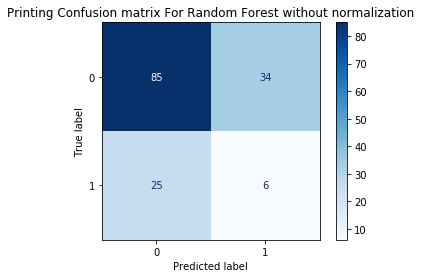

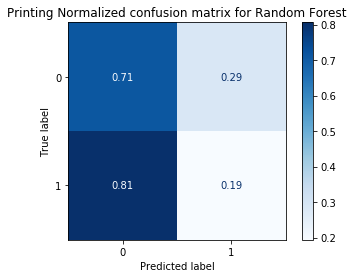

In [178]:
class_labels=[0,1]
titles = [("Printing Confusion matrix For Random Forest without normalization", None),
          ("Printing Normalized confusion matrix for Random Forest", 'true')]
for t, nz in titles:
    display = plot_confusion_matrix(r_f, X_test, Y_test, display_labels=class_labels,cmap=plt.cm.Blues,normalize=nz)
    display.ax_.set_title(t)
    print(t)
    print(display.confusion_matrix)
plt.show()

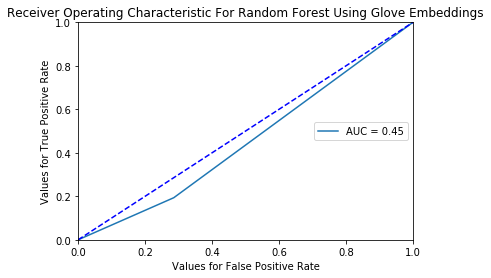

In [179]:
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(Y_test, value_pred_r_f)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.title('Receiver Operating Characteristic For Random Forest Using Glove Embeddings')
plt.plot(fpr_rf, tpr_rf, '', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='blue')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])#values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

<h1> Support Vector Machine Classifier </h1>

In [180]:
load_svm=svm.SVC(C=1.0, kernel='rbf', degree=3)
start_time=time.time()
load_svm.fit(X_train,Y_train)
value_pred_svm = load_svm.predict(X_test)
scores_svm=cross_val_score(load_svm, X_test,Y_test, cv=10)
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for Support Vector Machine Classifier is \n",confusion_matrix(Y_test,value_pred_svm))
print("Accuracy after applying Support Vector Machine is",(accuracy_score(Y_test,value_pred_svm)))
print("Scores after applying 10 CV on Support Vector Machine",np.average(scores_svm))
print("Precision for Support Vector Machine ",precision_score(Y_test,value_pred_svm))
print("Recall for Support Vector Machine ",recall_score(Y_test,value_pred_svm))

Finished in ...  0.02732706069946289
Confusion Matrix obtained for Support Vector Machine Classifier is 
 [[119   0]
 [ 31   0]]
Accuracy after applying Support Vector Machine is 0.7933333333333333
Scores after applying 10 CV on Support Vector Machine 0.7866666666666667
Precision for Support Vector Machine  0.0
Recall for Support Vector Machine  0.0


Printing Confusion matrix For Support Vector Machine without normalization
[[119   0]
 [ 31   0]]
Printing Normalized confusion matrix for Support Vector Machine
[[1. 0.]
 [1. 0.]]


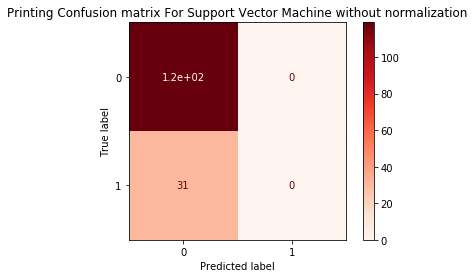

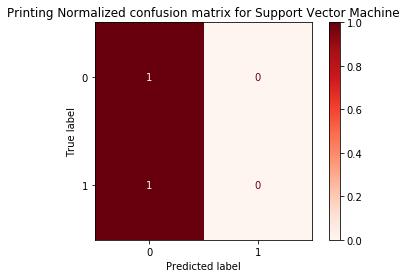

In [181]:
class_labels=[0,1]
titles = [("Printing Confusion matrix For Support Vector Machine without normalization", None),
          ("Printing Normalized confusion matrix for Support Vector Machine", 'true')]
for t, nz in titles:
    display = plot_confusion_matrix(load_svm, X_test, Y_test,display_labels=class_labels,cmap=plt.cm.Reds,normalize=nz)
    display.ax_.set_title(t)
    print(t)
    print(display.confusion_matrix)
plt.show()

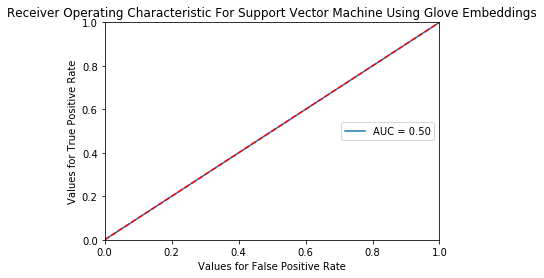

In [182]:
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(Y_test, value_pred_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

plt.title('Receiver Operating Characteristic For Support Vector Machine Using Glove Embeddings')
plt.plot(fpr_svm, tpr_svm, '', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])#values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

<h1> Logistic Regression  </h1>

In [183]:
load_log_reg=LogisticRegression(penalty='l2',random_state=None)
start_time=time.time()
load_log_reg.fit(X_train,Y_train)
value_pred_log = load_log_reg.predict(X_test)
scores_log_reg=cross_val_score(load_log_reg, X_test,Y_test, cv=10) 
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for Logistic Regression is \n",confusion_matrix(Y_test,value_pred_log))
print("Accuracy after applying Logistic Regression is",(accuracy_score(Y_test,value_pred_log)))
print("Scores after applying 10 CV on Logistic Regression",np.average(scores_log_reg))
print("Precision for Logistic Regression ",precision_score(Y_test,value_pred_log))
print("Recall for Logistic Regression ",recall_score(Y_test,value_pred_log))

Finished in ...  0.03197526931762695
Confusion Matrix obtained for Logistic Regression is 
 [[119   0]
 [ 31   0]]
Accuracy after applying Logistic Regression is 0.7933333333333333
Scores after applying 10 CV on Logistic Regression 0.7933333333333333
Precision for Logistic Regression  0.0
Recall for Logistic Regression  0.0


Printing Confusion matrix For Logistic Regression without normalization
[[119   0]
 [ 31   0]]


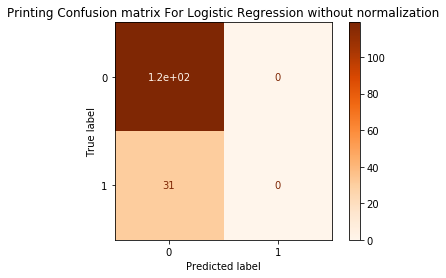

In [184]:
class_labels=[0,1]
titles = [("Printing Confusion matrix For Logistic Regression without normalization", None),
          ]
for t, nz in titles:
    display = plot_confusion_matrix(load_log_reg, X_test, Y_test,display_labels=class_labels,normalize=nz,cmap=plt.cm.Oranges)
    display.ax_.set_title(t)
    print(t)
    print(display.confusion_matrix)
plt.show()

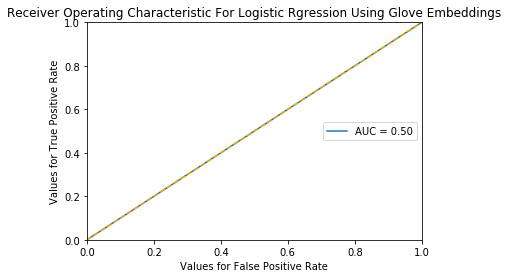

In [185]:
fpr_log, tpr_log, threshold_log = metrics.roc_curve(Y_test, value_pred_log)
roc_auc_log_reg = metrics.auc(fpr_log, tpr_log)

plt.title('Receiver Operating Characteristic For Logistic Rgression Using Glove Embeddings')
plt.plot(fpr_log, tpr_log, '', label = 'AUC = %0.2f' % roc_auc_log_reg)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='orange')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])#values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

 <h1> XGBoost with random forest as week learner  </h1>

In [186]:
load_xg_boost = xgb.XGBClassifier(gamma=0.1,base_estimator= r_f, objective='binary:logistic', learning_rate=0.01, max_depth=10, n_estimators=200, random_state=1)
load_xg_boost.fit(X_train, Y_train)
val_pred_xg_boost = load_xg_boost.predict(X_test)
scores_xg_boost=cross_val_score(load_xg_boost, X_test,Y_test, cv=10)
xg_boost_predictions = [round(value) for value in val_pred_xg_boost]
print("Confusion Matrix obtained for XG Boost is \n",confusion_matrix(Y_test,xg_boost_predictions))
print("Accuracy after applying XG Boost",(accuracy_score(Y_test,xg_boost_predictions)))
print("Scores after applying 10 CV on XG Boost",np.average(scores_xg_boost))
print("Precision for XG Boost ",precision_score(Y_test,xg_boost_predictions))
print("Recall for XG Boost ",recall_score(Y_test,xg_boost_predictions))

Confusion Matrix obtained for XG Boost is 
 [[111   8]
 [ 27   4]]
Accuracy after applying XG Boost 0.7666666666666667
Scores after applying 10 CV on XG Boost 0.7533333333333333
Precision for XG Boost  0.3333333333333333
Recall for XG Boost  0.12903225806451613


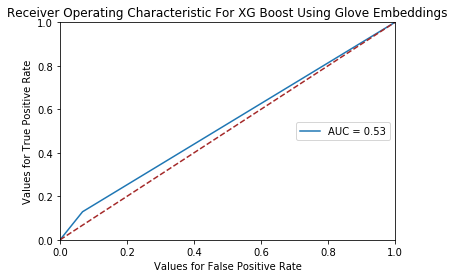

In [187]:
fpr_xg_boost, tpr_xg_boost, threshold_xg_boost = metrics.roc_curve(Y_test, xg_boost_predictions)
roc_auc_xg_boost = metrics.auc(fpr_xg_boost, tpr_xg_boost)

plt.title('Receiver Operating Characteristic For XG Boost Using Glove Embeddings')
plt.plot(fpr_xg_boost, tpr_xg_boost, '', label = 'AUC = %0.2f' % roc_auc_xg_boost)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='brown')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])   #values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

<h1> Adaboost with default decision trees </h1>

In [188]:
load_adb = AdaBoostClassifier() #default learner is decision trees
start_time=time.time()
load_adb.fit(X_train,Y_train)
val_pred_adb = load_adb.predict(X_test)
scores_adb_=cross_val_score(load_adb, X_test,Y_test, cv=10)
adb_predictions = [round(value) for value in val_pred_adb]
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for Adaboost is \n",confusion_matrix(Y_test,adb_predictions))
print("Accuracy after applying Adaboost",(accuracy_score(Y_test,adb_predictions)))
print("Scores after applying 10 CV on Adaboost",np.average(scores_adb_))
print("Precision for AdaBoost ",precision_score(Y_test,adb_predictions))
print("Recall for AdaBoost ",recall_score(Y_test,adb_predictions))

Finished in ...  0.5570027828216553
Confusion Matrix obtained for Adaboost is 
 [[114   5]
 [ 30   1]]
Accuracy after applying Adaboost 0.7666666666666667
Scores after applying 10 CV on Adaboost 0.74
Precision for AdaBoost  0.16666666666666666
Recall for AdaBoost  0.03225806451612903


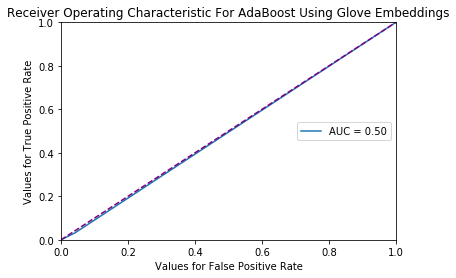

In [189]:
fpr_adb, tpr_adb, thresholdadb = metrics.roc_curve(Y_test, adb_predictions)
roc_auc_adb = metrics.auc(fpr_adb, tpr_adb)

plt.title('Receiver Operating Characteristic For AdaBoost Using Glove Embeddings')
plt.plot(fpr_adb, tpr_adb, '', label = 'AUC = %0.2f' % roc_auc_adb)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='purple')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])   #values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

<h1> Gradient Boosting with default decision trees   </h1>

In [190]:
load_gdb = GradientBoostingClassifier(n_estimators=100)
start_time=time.time()
load_gdb.fit(X_train,Y_train)
value_pred_gdb = load_gdb.predict(X_test)
scores_gdb_=cross_val_score(load_gdb, X_test,Y_test, cv=10)
gdb_predictions = [round(value) for value in value_pred_gdb]
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for Gradient Boosting is \n",confusion_matrix(Y_test,gdb_predictions))
print("Accuracy after applying Gradient Boosting",(accuracy_score(Y_test,gdb_predictions)))
print("Scores after applying 10 CV on Gradient Boosting",np.average(scores_gdb_))
print("Precision for Gradient Boosting ",precision_score(Y_test,adb_predictions))
print("Recall for Gradient Boosting ",recall_score(Y_test,adb_predictions))

Finished in ...  0.5821709632873535
Confusion Matrix obtained for Gradient Boosting is 
 [[97 22]
 [27  4]]
Accuracy after applying Gradient Boosting 0.6733333333333333
Scores after applying 10 CV on Gradient Boosting 0.6866666666666666
Precision for Gradient Boosting  0.16666666666666666
Recall for Gradient Boosting  0.03225806451612903


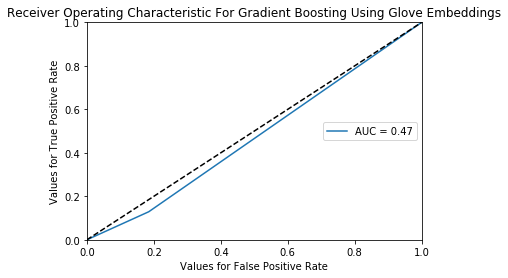

In [191]:
fpr_gdb, tpr_gdb, thresholdgdb = metrics.roc_curve(Y_test, gdb_predictions)
roc_auc_gdb = metrics.auc(fpr_gdb, tpr_gdb)

plt.title('Receiver Operating Characteristic For Gradient Boosting Using Glove Embeddings')
plt.plot(fpr_gdb, tpr_gdb, '', label = 'AUC = %0.2f' % roc_auc_gdb)
plt.legend(loc = 'center right')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')
plt.xlim([0, 1])   #values for x limit
plt.ylim([0, 1])   #values for y limit
plt.ylabel('Values for True Positive Rate')
plt.xlabel('Values for False Positive Rate')
plt.show()

# <h1> ROC Curve for all algorithms </h1>

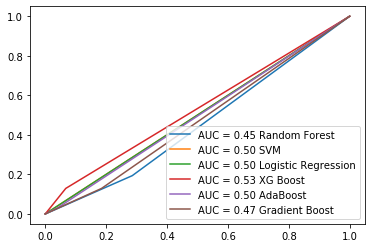

In [192]:
plt.figure(0).clf() #creating figure
plt.plot(fpr_rf, tpr_rf, '', label = 'AUC = %0.2f Random Forest' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, '', label = 'AUC = %0.2f SVM' % roc_auc_svm)
plt.plot(fpr_log, tpr_log, '', label = 'AUC = %0.2f Logistic Regression' % roc_auc_log_reg)
plt.plot(fpr_xg_boost, tpr_xg_boost, '', label = 'AUC = %0.2f XG Boost' % roc_auc_xg_boost)
plt.plot(fpr_adb, tpr_adb, '', label = 'AUC = %0.2f AdaBoost' % roc_auc_adb)
plt.plot(fpr_gdb, tpr_gdb, '', label = 'AUC = %0.2f Gradient Boost' % roc_auc_gdb)
plt.plot()
plt.legend(loc=4)

<h1> BiLSTM Model </h1>

In [193]:
MAX_NUM_WORDS_check = len(counts) #creating check of maximum words
tokenizer_check= Tokenizer(num_words=MAX_NUM_WORDS_check) #tokenizing context
tokenizer_check.fit_on_texts(cleaned_tweets)
word_vector_obtained = tokenizer_check.texts_to_sequences(cleaned_tweets)
word_index_obtained = tokenizer_check.word_index
vocab_size_check = len(word_index_obtained) #checking size of vocab
vocab_size_check #printing vocab for display

3321

In [194]:
MAX_SEQ_LENGTH_CHECK = 10  #defining sequence length
input_tensor_obtained = pad_sequences(word_vector_obtained, maxlen=MAX_SEQ_LENGTH_CHECK) #creating input tensor
print(input_tensor_obtained.shape)
EMBEDDING_DIMENSIONS = 50 #defining shape of embeddings
embedding_matrix = np.zeros((MAX_NUM_WORDS_check, EMBEDDING_DIMENSIONS)) #creating embedding matrix

(500, 10)


In [195]:
input_obtained = Input(shape=(MAX_SEQ_LENGTH_CHECK,)) #initializing neural nets
x_obtained = Embedding(MAX_NUM_WORDS_check, EMBEDDING_DIMENSIONS, weights=[word_matrix_embeddings])(input_obtained)
x_obtained = Bidirectional(LSTM(10 , recurrent_dropout=0.01,return_sequences=True,dropout=0.20))(x_obtained)
x_obtained = GlobalMaxPool1D()(x_obtained)#[preparing inputs]
x_obtained = Dense(10, activation="relu")(x_obtained)#applying relu effect
x_obtained = Dropout(0.20)(x_obtained)
x_obtained = Dense(1, activation="sigmoid")(x_obtained)#applying sigmoid reg

In [196]:
model_lstm = Model(inputs=input_obtained, outputs=x_obtained)
model_lstm.compile(optimizer='adam', metrics=['accuracy'],loss='binary_crossentropy')

In [197]:
x_train, x_test, y_train, y_test = train_test_split(input_tensor_obtained, final_data['target'], test_size=0.3)

In [198]:
model_lstm.fit(x_train, y_train, batch_size=8, epochs=5) #fitting neural nets on data

Epoch 1/5
350/350 [==============================] - 1s 4ms/step - loss: 0.6547 - accuracy: 0.6457
Epoch 2/5
350/350 [==============================] - 0s 900us/step - loss: 0.5126 - accuracy: 0.7943
Epoch 3/5
350/350 [==============================] - 0s 870us/step - loss: 0.4801 - accuracy: 0.7943
Epoch 4/5
350/350 [==============================] - 0s 864us/step - loss: 0.4476 - accuracy: 0.7943
Epoch 5/5
350/350 [==============================] - 0s 869us/step - loss: 0.3989 - accuracy: 0.7943


In [199]:
preds_lstm = model_lstm.predict(x_test)
preds_lstm  = np.round(preds_lstm.flatten())
print(classification_report(y_test, preds_lstm, digits=3))

              precision    recall  f1-score   support

           0      0.813     1.000     0.897       122
           1      0.000     0.000     0.000        28

    accuracy                          0.813       150
   macro avg      0.407     0.500     0.449       150
weighted avg      0.662     0.813     0.730       150



# <h1>Long Short Term Memory</h1>

In [200]:
model_lstm_load = Sequential() #loading lstm for sequential classification 
model_lstm_load.add(Embedding(len(word_matrix_embeddings), 
                               EMBEDDING_DIMENSIONS, weights=[word_matrix_embeddings], 
                            input_length=10, trainable=False))
model_lstm_load.add(Conv1D(kernel_size=3, filters=32, activation='relu',padding='same'))
model_lstm_load.add(MaxPooling1D(pool_size=2)) #adding pool size
model_lstm_load.add(Dropout(0.2)) #selecting parameter for dropout
model_lstm_load.add(LSTM(300)) #add layers
model_lstm_load.add(Dropout(0.2)) #again defining dropout
model_lstm_load.add(Dense(1, activation='sigmoid')) #adding sigmoid parameter

In [201]:
model_lstm_load.compile(loss='binary_crossentropy',  metrics=['acc'],optimizer='nadam')
print(model_lstm_load.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 50)            166050    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 32)            4832      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 32)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 32)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [202]:
EPOCHS=5 #defining number of epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3) #defining early stop
model_seq_hist = model_lstm_load.fit(x_train, y_train,epochs=EPOCHS, batch_size=12,shuffle=True,callbacks=[early_stop])


Epoch 1/5
350/350 [==============================] - 1s 2ms/step - loss: 0.4958 - acc: 0.7743
Epoch 2/5
350/350 [==============================] - 0s 528us/step - loss: 0.3651 - acc: 0.8371
Epoch 3/5
350/350 [==============================] - 0s 565us/step - loss: 0.2996 - acc: 0.8457
Epoch 4/5
350/350 [==============================] - 0s 553us/step - loss: 0.1980 - acc: 0.9114
Epoch 5/5
350/350 [==============================] - 0s 648us/step - loss: 0.1547 - acc: 0.9600


In [203]:
labels_pred_seq = model_lstm_load.predict(x_test)
labels_pred_seq = np.round(labels_pred_seq.flatten())
accuracy_seq = accuracy_score(y_test, labels_pred_seq)
print("Accuracy: %.2f%%" % (accuracy_seq*100))

Accuracy: 85.33%


In [204]:
print(classification_report(y_test, labels_pred_seq, digits=3))

              precision    recall  f1-score   support

           0      0.910     0.910     0.910       122
           1      0.607     0.607     0.607        28

    accuracy                          0.853       150
   macro avg      0.758     0.758     0.758       150
weighted avg      0.853     0.853     0.853       150

